# Aparupa Mitra

# Task 2 ,Data Science & Business Analytics Internship ,The Sparks Foundation



# Exploratory Data Analysis - Terrorism (Level - Intermediate)  

# Aim of this task is to  to find out the hot zone of terrorism


In [36]:
# MAJOR STEPS INVOLVE IN THIS PROCESS

# 1. DATA RETRIEVAL 

# 2. DATA PREPARATION /DATA CLEANING

# 3. DATA EXPLORATION


In [37]:
# import all packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [38]:
# DATA RETRIEVAL

#Load dataset 

zone = pd.read_csv(r"C:\Users\aparu\OneDrive\Desktop\globalterrorismdb_0718dist.csv" ,encoding ='ISO-8859-1' )

zone.head()

C:\Users\aparu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [39]:
# Find out data types of all the columns of dataframe

zone.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [40]:
# Find out the shape of dataframe
zone.shape

(181691, 135)

In [41]:
# try to remove duplicates from the dataset

zone.drop_duplicates(inplace =True)
zone.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# DATA PREPARATION/CLEANING

In [42]:
# HANDLING MISSING VALUES ....

# The steps are as follows..... 

# 1. Find out number of missing values for each columns

# 2.Find out percentages of missing values for each columns

# 3.Caculate and find the columns which have more than 50% of missing values in it.

# 4. Remove those columns(>50% missing values) from dataframe and save it in new dataset  'new_zone'

# 5. We will drop rows with NaN values from dataset


In [43]:
# Check for missing data for each of the columns in ascending order of number of missing values.


zone.isnull().sum().reset_index().sort_values(by=[0] , ascending= True)

,index,0
0,eventid,0
21,crit3,0
26,success,0
27,suicide,0
28,attacktype1,0
...,...,...
94,weaptype4_txt,181618
93,weaptype4,181618
95,weapsubtype4,181621
96,weapsubtype4_txt,181621


In [44]:
# Now check the percentages of missing values for each columns in descending order

percentage_of_missing_values = zone.isnull().sum()*100/len(zone)

percentage_of_missing_values.reset_index().sort_values(by=[0] , ascending= False) 

,index,0
63,gsubname3,99.988992
96,weapsubtype4_txt,99.961473
95,weapsubtype4,99.961473
93,weaptype4,99.959822
94,weaptype4_txt,99.959822
...,...,...
27,suicide,0.000000
26,success,0.000000
21,crit3,0.000000
104,property,0.000000


In [45]:
# create a dataframe to check percentage of missing values against each columns

missing_dataset =pd.DataFrame({'column_name' : zone.columns,
                              'percentage_of_missing_values': percentage_of_missing_values})

missing_dataset.sort_values('percentage_of_missing_values', ascending= False, inplace= True) 
missing_dataset

,column_name,percentage_of_missing_values
gsubname3,gsubname3,99.988992
weapsubtype4_txt,weapsubtype4_txt,99.961473
weapsubtype4,weapsubtype4,99.961473
weaptype4,weaptype4,99.959822
weaptype4_txt,weaptype4_txt,99.959822
...,...,...
suicide,suicide,0.000000
success,success,0.000000
crit3,crit3,0.000000
property,property,0.000000


In [46]:
# Find out the columns having missing values more than 50 percent 

remove_more_50percent_missing = missing_dataset[missing_dataset['percentage_of_missing_values']>50]

remove_more_50percent_missing.sort_values('percentage_of_missing_values', ascending= False, inplace= True)
remove_more_50percent_missing

C:\Users\aparu\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,column_name,percentage_of_missing_values
gsubname3,gsubname3,99.988992
weapsubtype4_txt,weapsubtype4_txt,99.961473
weapsubtype4,weapsubtype4,99.961473
weaptype4,weaptype4,99.959822
weaptype4_txt,weaptype4_txt,99.959822
...,...,...
propcomment,propcomment,68.100236
propextent,propextent,64.739585
propextent_txt,propextent_txt,64.739585
scite2,scite2,57.657231


In [47]:
# Now remove the columns having missing values more than 50 percent 

new_zone = zone.drop(remove_more_50percent_missing.index ,axis=1)
new_zone.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [48]:
# Again check percentage of missing values against each columns

new_zone.isna().sum()*100/len(zone)


eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [49]:
# Now drop the rows with missing values

new_zone= new_zone.dropna()
new_zone.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,0.0,0.0,1,0.0,"""Police Chief Quits,"" Washington Post, January...",Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,0.0,0.0,1,0.0,"Tom Bates, ""Rads: The 1970 Bombing of the Army...",Hewitt Project,0,0,0,0
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,...,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,Hewitt Project,0,0,0,0
11,197001060001,1970,1,6,0,217,United States,1,North America,Colorado,...,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9
13,197001090001,1970,1,9,0,217,United States,1,North America,Michigan,...,0.0,0.0,1,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9


In [50]:
# Now again check for missing values

new_zone.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
summary             0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
claimed             0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus   

In [51]:
# Computes a summary of descriptive statistics

zone.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Find out the correlation between columns of the dataset

new_zone.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999977,-0.002540,0.011733,-0.026522,-0.123240,0.351682,-0.089540,0.445122,0.083031,...,0.039313,0.016929,-0.063781,0.012843,-0.039578,-0.018256,0.032993,0.037929,-0.043753,0.030920
iyear,0.999977,1.000000,-0.007764,0.011540,-0.026597,-0.123273,0.351535,-0.089529,0.445147,0.082958,...,0.039354,0.016918,-0.063835,0.012866,-0.039468,-0.018317,0.032934,0.037876,-0.043836,0.030851
imonth,-0.002540,-0.007764,1.000000,0.015347,0.006431,0.008467,0.033856,0.006432,-0.001756,0.011554,...,-0.007571,0.002190,0.009567,-0.004541,-0.020820,0.008423,0.006037,0.004744,0.014366,0.007635
iday,0.011733,0.011540,0.015347,1.000000,-0.001662,-0.001284,0.020240,0.006090,0.007087,0.001641,...,-0.010349,-0.001388,-0.005549,0.002319,0.002245,-0.003039,-0.006149,-0.006141,-0.003584,-0.007988
extended,-0.026522,-0.026597,0.006431,-0.001662,1.000000,-0.008816,-0.019594,-0.048298,-0.000295,0.008777,...,0.032758,0.005204,0.003753,0.042791,0.000356,0.289400,0.060301,0.059887,0.046776,0.065151
country,-0.123240,-0.123273,0.008467,-0.001284,-0.008816,1.000000,0.040690,-0.015791,-0.133552,-0.092607,...,-0.038473,-0.016087,0.012961,-0.012760,-0.005119,-0.009750,-0.013799,-0.010383,0.235566,0.075578
region,0.351682,0.351535,0.033856,0.020240,-0.019594,0.040690,1.000000,0.118413,-0.062063,-0.082293,...,0.043002,0.057453,-0.064060,0.000320,-0.124212,-0.021625,0.021031,0.030982,0.047448,0.041466
latitude,-0.089540,-0.089529,0.006432,0.006090,-0.048298,-0.015791,0.118413,1.000000,-0.230519,-0.054572,...,0.011101,0.028368,0.019992,0.006921,-0.028731,-0.030367,-0.114419,-0.105430,0.053980,-0.074040
longitude,0.445122,0.445147,-0.001756,0.007087,-0.000295,-0.133552,-0.062063,-0.230519,1.000000,0.109721,...,0.002139,-0.001136,-0.074265,0.006734,-0.009926,0.004012,-0.047185,-0.050658,-0.104524,-0.078399
specificity,0.083031,0.082958,0.011554,0.001641,0.008777,-0.092607,-0.082293,-0.054572,0.109721,1.000000,...,0.021146,-0.035831,0.000148,0.026082,0.041583,0.004471,0.050201,0.046692,-0.002005,0.044308


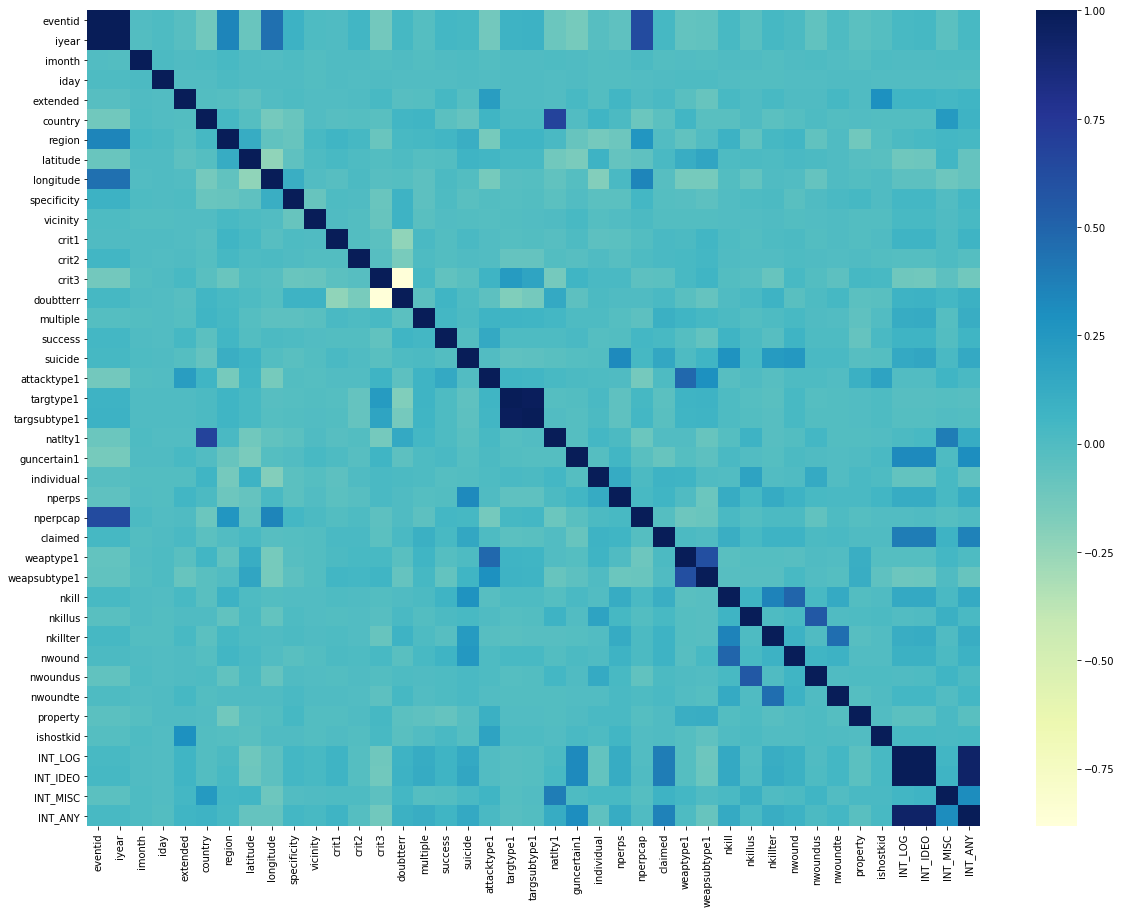

In [53]:
fig, ax = plt.subplots(figsize=(20,15) ) 
sns.heatmap(new_zone.corr(),ax=ax ,cmap="YlGnBu")

In [54]:
# VISUALIZATION---------------------------

# This involves two types of visualization

# 1. Exploration of single columns

# 2. Relationship Exploration


In [55]:
# VISUALIZATION 1 :Countrywise counts of attacks

dataset1 = new_zone['country_txt'].value_counts()
dataset1

Iraq                              6827
Pakistan                          4243
Afghanistan                       3536
India                             2574
Philippines                       1693
                                  ... 
Estonia                              1
Moldova                              1
Zambia                               1
People's Republic of the Congo       1
Costa Rica                           1
Name: country_txt, Length: 146, dtype: int64

In [56]:
fig =px.bar(dataset1.head(20) , x='country_txt', title="Countrywise counts of attacks in the world" )

fig.show()

In [57]:
# VISUALIZATION 2 : Find out the counts of each target places of terrorism

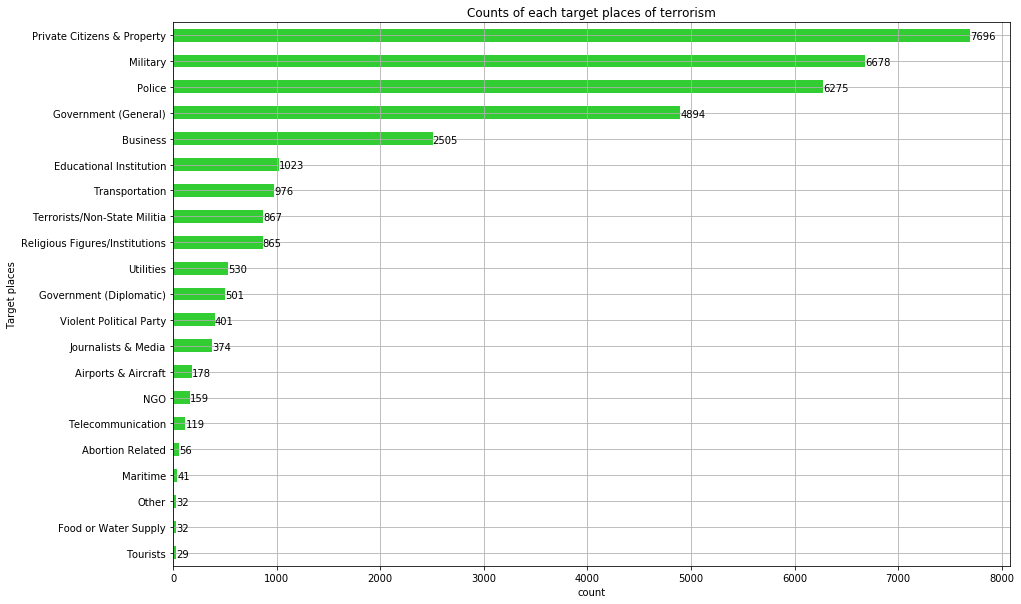

In [58]:
# Horizontal Annotate barplot

ax =new_zone['targtype1_txt'].value_counts().plot(kind="barh" ,figsize =(15,10) ,color ='limegreen')
plt.title("Counts of each target places of terrorism")
plt.xlabel("count")
plt.ylabel("Target places")
plt.grid(True)


totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    
    ax.text(i.get_width()+.9, i.get_y()+.4, \
            str(round(i.get_width(), 2)), fontsize=10,
color='black')

ax.invert_yaxis()


plt.show()

In [59]:
# VISUALIZATION 3  -Find out counts of weapon types

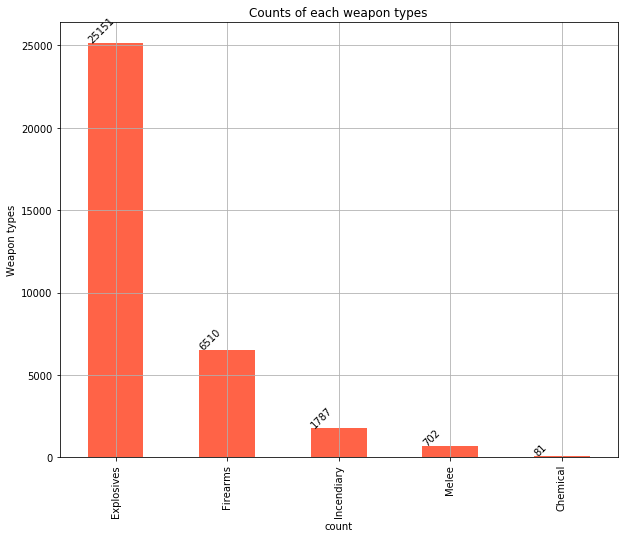

In [60]:
# Annotate barplot

ax =new_zone['weaptype1_txt'].value_counts().plot(kind="bar" ,figsize =(10,8) ,color ='tomato')
plt.title("Counts of each weapon types")
plt.xlabel("count")
plt.ylabel("Weapon types")
plt.grid(True)

# Vertical Annotate barplot 

total_list = []

for i in ax.patches:
    total_list.append(i.get_height())

for i in ax.patches:    
     
    ax.text(i.get_x()-.01, i.get_height()+.7, \
            str(round((i.get_height()),2)), fontsize=10,rotation=45)
plt.show()


In [61]:
#VISUALIZATION 4:Find out counts of each types of attacks by terrorist

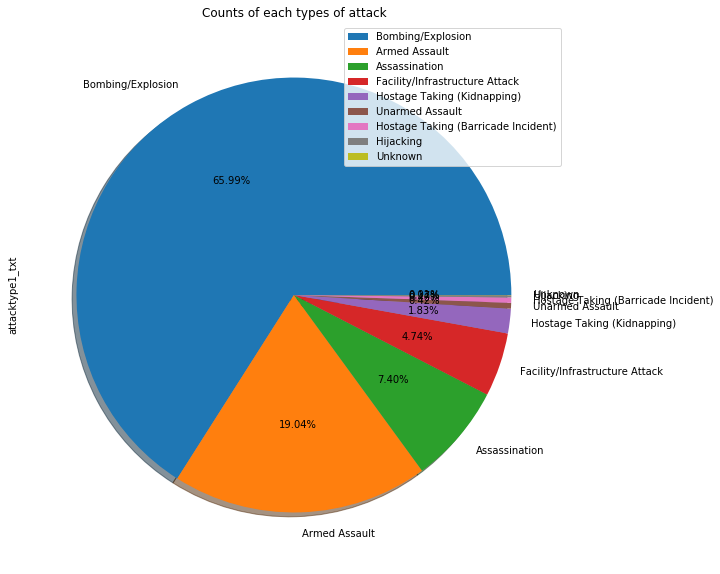

In [62]:
new_zone['attacktype1_txt'].value_counts().plot(kind="pie" ,figsize=(15,10),autopct ='%0.2f%%' ,shadow =True)
plt.title("Counts of each types of attack")

plt.legend(loc= 'upper right')

In [63]:
#VISUALIZATION 5:Terrorism attack by year wise

In [64]:
new_zone['iyear']

5         1970
8         1970
9         1970
11        1970
13        1970
          ... 
181680    2017
181681    2017
181684    2017
181687    2017
181689    2017
Name: iyear, Length: 34231, dtype: int64

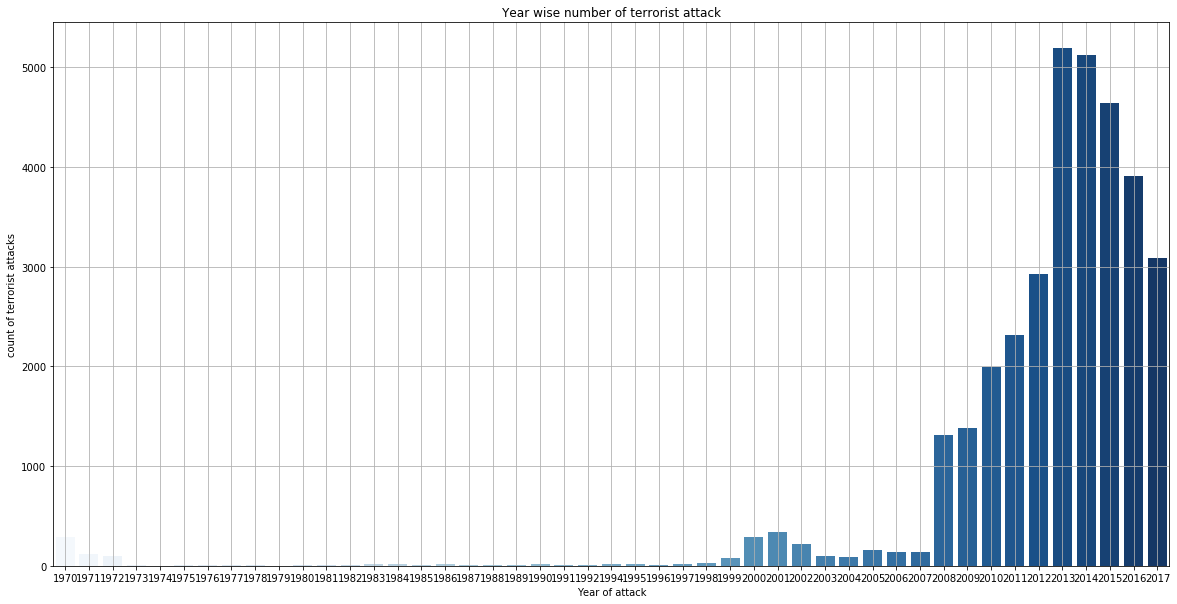

In [65]:
plt.subplots(figsize=(20,10))
sns.countplot('iyear',data =new_zone ,palette='Blues')
plt.title("Year wise number of terrorist attack")
plt.ylabel("count of terrorist attacks")
plt.xlabel("Year of attack")
plt.grid(True)
plt.show()

In [66]:
# RELATIONSHIP EXPLORATION 

#1. Find out regionwise how much terrorist activities has been successful

In [67]:
df =new_zone[['region_txt','imonth','success','nkill']]
df

,region_txt,imonth,success,nkill
5,North America,1,1,0.0
8,North America,1,1,0.0
9,North America,1,1,0.0
11,North America,1,1,0.0
13,North America,1,1,0.0
...,...,...,...,...
181680,Sub-Saharan Africa,12,1,0.0
181681,Southeast Asia,12,1,1.0
181684,South Asia,12,1,0.0
181687,Middle East & North Africa,12,1,2.0


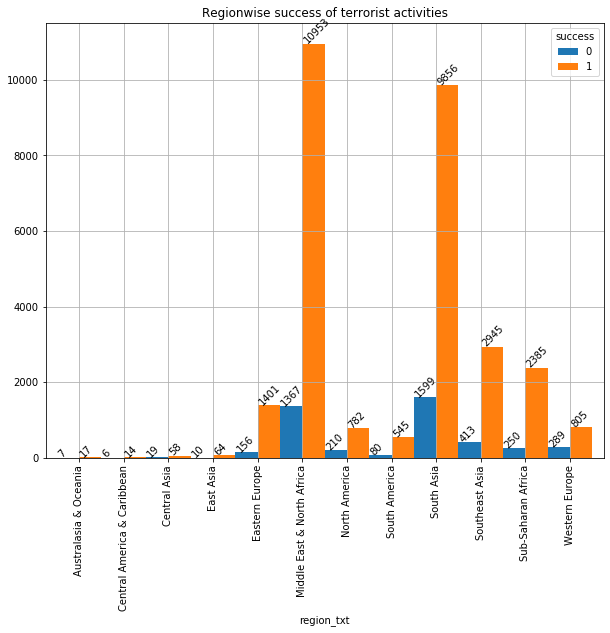

In [68]:
df1 = df.groupby('region_txt')['success'].value_counts().unstack()
ax =df1.plot(kind="bar",width=1 ,figsize =(10,8))


# Vertical Annotate barplot 

total_list = []

for i in ax.patches:
    total_list.append(i.get_height())

for i in ax.patches:    
     
    ax.text(i.get_x()-.01, i.get_height()+.7, \
            str(round((i.get_height()),2)), fontsize=10,rotation=45)


plt.title("Regionwise success of terrorist activities")
plt.grid(True)
plt.show()

# Summary from visualization

# 1. From visualization 1 , we can see that country Iraq has the highest count of terror attacks all over the world.

# From Visualization 2 , we found that private citizen propery ,Military locations and police stations are some of the hot places of terror attacks.

# From Visualization 3, we can see that explosives followed by firearms have the highest counts which are used by terrorists.

# From Visualization 4 , Bombing and explosions are the major actions mostly taken in terrorism.

# From visualization 5 , we can see that maximum terrorist attack took place between year 2013 to 2016.

# From Relationship Exploration ,we found that terrorist activities are mostly successful in regions of Middle East & North Africa ,followed by South Asia.
